# Survival Analysis

Survival analysis is a set of statistical approaches used to find out the time it takes for an event of interest to occur. Survival analysis is used to study the time until some event of interest (often referred to as death) occurs

# Cancer Studies

In cancer studies, most of the survival analyses use the following methods.

(1) Kaplan-Meier plots to visualize survival curves.

(2) Nelson-Aalen plots to visualize the cumulative hazard.

(3) Log-rank test to compare the survival curves of two or more groups

(4) Cox proportional hazards regression to find out the effect of different variables like age, sex, weight on survival.

# Terminology

## Survival time and event:

Survival Time: referred to an amount of time until when a subject is alive or actively participates in a survey.

There are mainly three types of events, including:

(1) Relapse: a deterioration in someone’s state of health after a temporary improvement.

(2) Progression: the process of developing or moving gradually towards a more advanced state. ( Improvement in health.)

(3) Death: the destruction or permanent end of something.

## Censoring of data:

As mentioned above, survival analysis focuses on the occurrence of an event of interest (e.g., birth, death, retirement). But there is still a possibility that the event may not be observed for various reasons. Such observations are known as censored observations.

Censoring may arise in the following ways:

A patient has not (yet) experienced the event of interest (death or relapse in our case) within the study period.
A patient is not followed anymore.
If a patient moves to another city, then follow-up might not be possible for the hospital staff.
This type of censoring, named right censoring, is handled in survival analysis.

There are three general types of censoring, right-censoring, left-censoring, and interval-censoring.

Right Censoring: The death of the person.

Left Censoring: The event can’t be observed for some reason. It includes events that occurred before the experiment started. (e.g., number of days from birth when the kid started walking.)

Interval Censoring: When we have data for some intervals only.

## Survival function and hazard function

We generally use two related probabilities to analyse survival data.

(1) The survival probability

(2) The hazard probability

To find survival probability, we’ll be using survivor function S(t), which is the Kaplan-Meier Estimator. Survival probability is the probability that an individual (e.g., patient) survives from the time origin (e.g., diagnosis of cancer) to a specified future time t. For example, S(200) = 0.7 means that after 200 days has passed since the diagnosis of cancer, the patient’s survival probability has dropped to 0.7. If the person stays alive at the end of an experiment, then that data will be censored.

The hazard probability, denoted by h(t), is the probability that an individual(e.g., patient) who is under observation at a time t has an event(e.g., death) at that time. For example, If h(200) = 0.7, then it means that the probability of that person being dead at time t=200 days is 0.7.

Note that, in contrast to the survivor function, which focuses on not having an event, the hazard function focuses on the event occurring. I think we can clearly see that higher survival probability and lower hazard probability is good for the patient.


# Kaplan-Meier Estimator (Without any groups)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [ ]:
data = pd.read_csv("lung.csv")
data.head()

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data["sex"].hist()

In [ ]:
kmf = KaplanMeierFitter()

In [ ]:
data.loc[data.status == 1, 'dead'] = 0

data.loc[data.status == 2, 'dead'] = 1

data.head()

In [ ]:
kmf.fit(durations = data["time"], event_observed= data["dead"])

In [ ]:
# In the kmf event table we make some observations during EDA

# Removed = Observed + Censored
# Censored = Person that can't die (No use to us!)
# Observed = Persons that died

kmf.event_table

We can calculate all prediction by hand but kmf does them for us

In [14]:
kmf.predict(11)

0.9824561403508766

In [16]:
kmf.predict([0,5,11,12])

0     1.000000
5     0.995614
11    0.982456
12    0.978070
Name: KM_estimate, dtype: float64

In [17]:
kmf.survival_function_ # Shows all predictions using kmf

,KM_estimate
timeline,
0.0,1.000000
5.0,0.995614
11.0,0.982456
12.0,0.978070
13.0,0.969298
...,...
840.0,0.067127
883.0,0.050346
965.0,0.050346


In [18]:
# It provides the number of days where on average 50% of patients died.
kmf.median_survival_time_


310.0

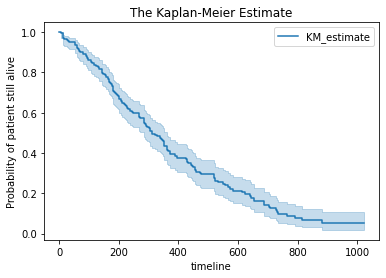

In [19]:
# Plot the graph :
kmf.plot()
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Probability of patient still alive")
plt.show()

In [20]:
kmf.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
5.0,0.969277,0.999381
11.0,0.953935,0.993379
12.0,0.948120,0.990813
13.0,0.936682,0.985244
...,...,...
840.0,0.030728,0.123060
883.0,0.017866,0.108662
965.0,0.017866,0.108662
1010.0,0.017866,0.108662


In [21]:
# Probability of dying

kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017544
12.0,0.021930
13.0,0.030702
...,...
840.0,0.932873
883.0,0.949654
965.0,0.949654


<AxesSubplot:xlabel='timeline'>

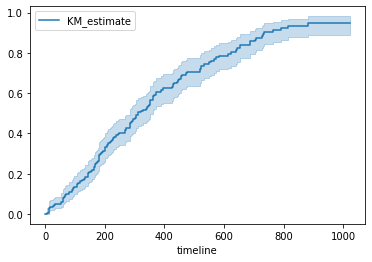

In [22]:
# Plot the graph :
kmf.plot_cumulative_density()

## Now we will find the hazard function

<AxesSubplot:xlabel='timeline'>

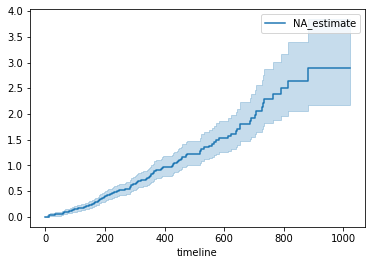

In [25]:
from lifelines import NelsonAalenFitter

naf = NelsonAalenFitter()
naf.fit(data["time"],event_observed = data["dead"])
naf.cumulative_hazard_
naf.plot()

In [26]:
# Predicting value at certain point

naf.predict(1022)

2.8915648373471052